***1. What is K-Nearest Neighbors (KNN) and how does it work?***

KNN is a supervised learning algorithm used for classification and regression. It classifies a new data point based on the majority vote or average of its K nearest neighbors in the training dataset, based on a distance metric like Euclidean distance.



***2. What is the difference between KNN Classification and KNN Regression?***

KNN Classification: Predicts a class label by majority voting of neighbors.

KNN Regression: Predicts a continuous value by averaging the values of neighbors.



***3. What is the role of the distance metric in KNN?***

The distance metric (like Euclidean, Manhattan, or Minkowski) determines how the "closeness" of points is measured. It directly affects which neighbors are considered "nearest" and hence the prediction.

***4. What is the Curse of Dimensionality in KNN?***

In high-dimensional spaces, distances between data points become similar, making it hard to find meaningful nearest neighbors. This reduces the performance of KNN.

***5. How can we choose the best value of K in KNN?***

Use cross-validation to test different values of K.

A small K (e.g., 1) may lead to overfitting, while a large K may lead to underfitting.

Odd values of K are preferred for classification to avoid ties.

***6. What are KD Tree and Ball Tree in KNN?***

These are data structures used to speed up the search for nearest neighbors:

KD Tree: Binary tree based on axis-aligned splits (efficient in low dimensions).

Ball Tree: Uses hyperspheres to partition space (better for high dimensions).



***7. When should you use KD Tree vs. Ball Tree?***

Use KD Tree when dimensions are low (<25).

Use Ball Tree when working with high-dimensional data.

***8. What are the disadvantages of KNN?***

Slow at prediction time (needs to compute distance to all points).

Sensitive to noise and outliers.

Requires feature scaling.

Affected by curse of dimensionality.

***9. How does feature scaling affect KNN?***

KNN is distance-based, so unscaled features can dominate the distance metric. Techniques like StandardScaler or MinMaxScaler should be applied to normalize features.

***10. What is PCA (Principal Component Analysis)?***

PCA is a dimensionality reduction technique that transforms data into a new coordinate system, maximizing variance in the first few components (principal components).



***11. How does PCA work?***

Standardize the data.

Compute the covariance matrix.

Calculate eigenvalues and eigenvectors.

Choose top components and project the data into this new space.

***12. What is the geometric intuition behind PCA?***

PCA finds new axes (principal components) along directions of maximum variance and projects the data onto these axes to reduce dimensionality while preserving the most information.

***13. What is the difference between Feature Selection and Feature Extraction?***

Feature Selection: Chooses a subset of original features.

Feature Extraction: Creates new features from original ones (e.g., PCA).

***14. What are Eigenvalues and Eigenvectors in PCA?***

Eigenvectors: Directions of the new axes (principal components).

Eigenvalues: Magnitude of variance along each eigenvector. Higher eigenvalue = more variance explained.



***15. How do you decide the number of components to keep in PCA?***

Use a scree plot (elbow method).

Keep components that explain ≥ 95% of the variance.

Or use cumulative explained variance threshold.

***16. Can PCA be used for classification?***

Yes, but indirectly. PCA is used for preprocessing (reducing dimensionality), after which classification algorithms (like KNN, SVM) are applied.



***17. What are the limitations of PCA?***

Assumes linear relationships.

May lose interpretability.

Sensitive to scaling and outliers.

Doesn't work well if important information is in low-variance components.

***18. How do KNN and PCA complement each other?***

PCA can reduce dimensions and remove noise, which makes KNN faster and sometimes more accurate by reducing the effect of irrelevant or redundant features.

***19. How does KNN handle missing values in a dataset?***

KNN does not handle missing values natively. You must impute missing values using methods like KNN imputation, mean/mode, or drop rows/columns before applying KNN.



***20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?***

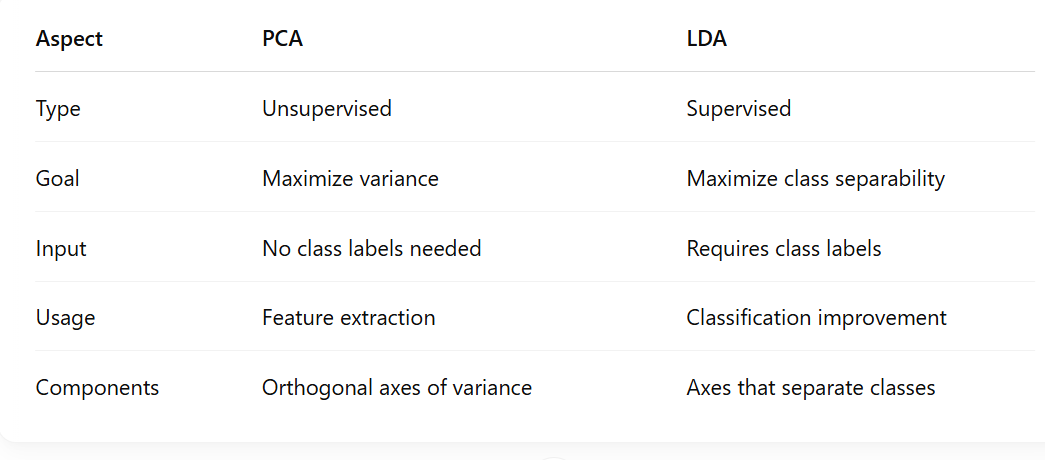

**Practicle que**


***1. Train a KNN Classifier on the Iris dataset and print model accuracy***

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


***2. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)***

In [2]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 128.82204336272395


***3. Train a KNN Classifier using Euclidean and Manhattan distance***

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and split the dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# Scaling (important for distance-based models like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try both distance metrics
for metric in ['euclidean', 'manhattan']:
    model = KNeighborsClassifier(metric=metric, algorithm='brute')  # brute supports both metrics
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{metric.capitalize()} Accuracy:", accuracy_score(y_test, y_pred))




Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0


***4. Train a KNN Classifier with different values of K and visualize decision boundaries***

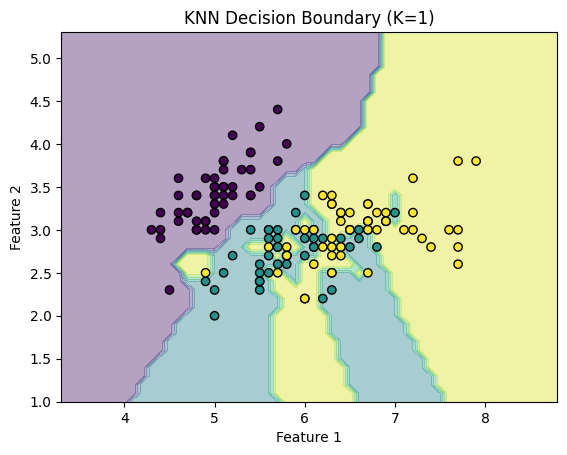

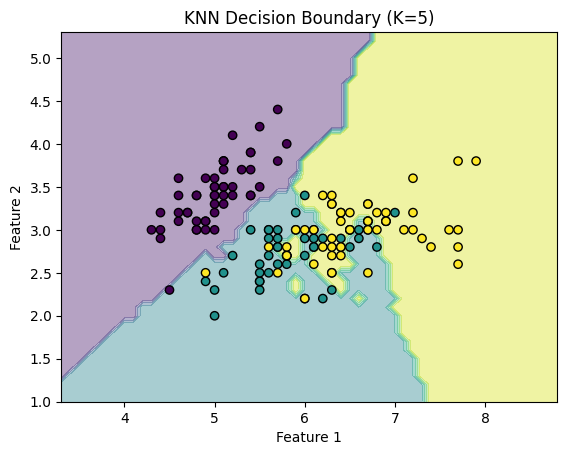

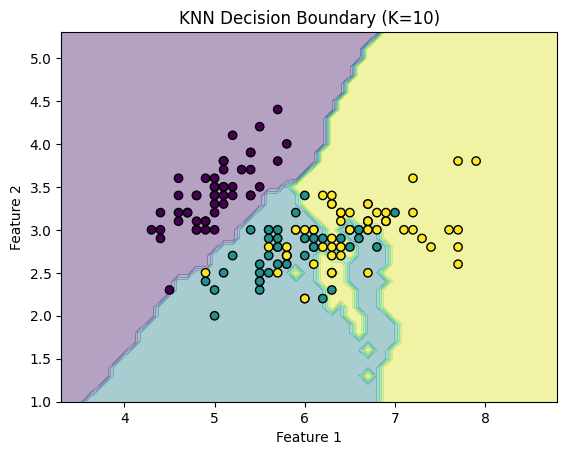

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

X, y = iris.data[:, :2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for k in [1, 5, 10]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f'KNN Decision Boundary (K={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


***5. Apply Feature Scaling before training KNN and compare***

In [7]:
from sklearn.preprocessing import StandardScaler

# Without scaling
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("Unscaled Accuracy:", model.score(X_test, y_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
print("Scaled Accuracy:", model.score(X_test_scaled, y_test))


Unscaled Accuracy: 0.8157894736842105
Scaled Accuracy: 0.7894736842105263


***6. Train a PCA model on synthetic data and print explained variance ratio***

In [8]:
from sklearn.decomposition import PCA

X, _ = make_regression(n_samples=100, n_features=5, noise=0.1)
pca = PCA()
pca.fit(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.24937269 0.23250997 0.21065622 0.16972603 0.13773509]


***7. Apply PCA before training a KNN Classifier***

In [9]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = KNeighborsClassifier()
model.fit(X_train_pca, y_train)
print("Accuracy with PCA:", model.score(X_test_pca, y_test))


Accuracy with PCA: 0.7894736842105263


***8. Perform Hyperparameter Tuning on KNN using GridSearchCV***

In [10]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(1, 11)}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'n_neighbors': 10}
Best Score: 0.7683794466403162


***9. Train a KNN Classifier and check misclassified samples python Copy Edit***


In [11]:
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Misclassified Samples:", (y_test != y_pred).sum())


Misclassified Samples: 8


***10. Visualize cumulative explained variance of PCA***

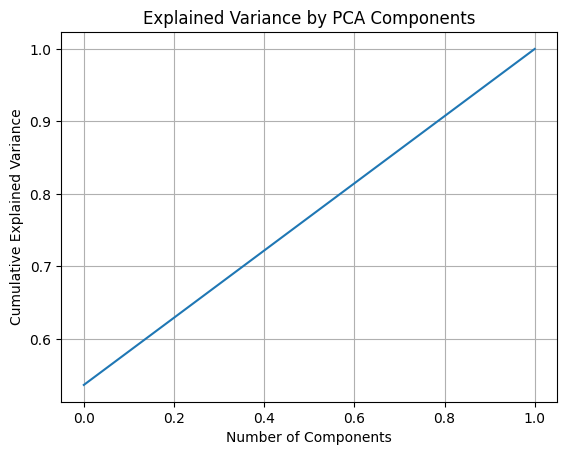

In [12]:
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()
